<a href="https://colab.research.google.com/github/raklives/practice-projects/blob/master/the_young.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Segmentation / Market BAsket Analysis

In [0]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
from collections import Counter 
import datetime
import wordcloud
import json


In [0]:
# hide warnings for cleaner display
warnings.filterwarnings('ignore')

# configure some options
%matplotlib inline 
%config InLineBackend.figure_format = 'retina'

In [0]:
# read in the data
responses = pd.read_csv('responses.csv')

In [7]:
# check
responses.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [24]:
# do we have all our columns and rows
responses.shape

(1010, 150)

In [8]:
# list out all the columns
list(responses.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

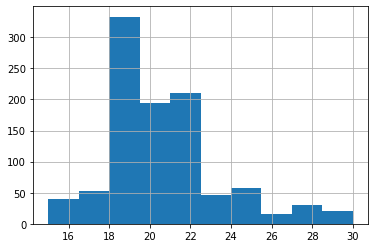

In [35]:
# explore distributions of Age
responses['Age'].hist(bins=10);

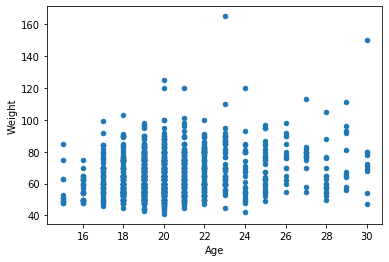

In [37]:
# quick scatterplot of age and weight
responses.plot.scatter('Age', 'Weight');

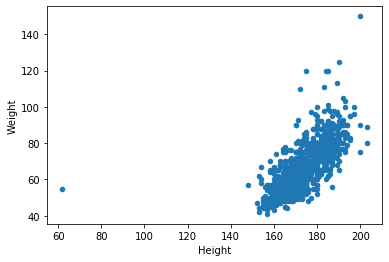

In [39]:
# height and weight 
responses.plot.scatter('Height', "Weight");

### Correlation between demography and some of the other coluns
### currently interest in personality traits and view on life columns 

In [9]:
# demographic columns and how they correlation with 
responses.corr()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.100207,0.081572,0.031212,-0.007589,0.059276,0.064674,0.079583,0.165995,0.025163,0.072208,0.062099,0.059553,0.096121,0.110524,0.124168,0.044709,0.061320,0.019095,0.208587,-0.025005,0.021672,0.080313,0.063527,0.020667,-0.035345,0.122020,0.086014,-0.038650,-0.063580,-0.002665,0.019379,0.053909,-0.072768,-0.069702,-0.068848,0.146442,0.014150,-0.025346,0.041671,...,0.046208,0.008131,-0.023091,-0.007224,-0.029594,0.104106,0.024672,0.029275,0.041478,0.111217,0.083740,0.006519,-0.019016,0.058543,0.032733,0.019232,0.024193,0.022838,0.025453,0.045979,0.045004,0.052276,-0.013771,0.047329,0.013839,0.088511,0.097759,0.019092,0.084712,-0.032529,0.098186,0.021549,0.044171,0.093457,0.018580,0.071822,-0.076829,-0.068953,-0.130746,-0.009812
Slow songs or fast songs,0.100207,1.000000,0.196041,-0.060910,-0.070274,-0.156435,-0.069897,0.064220,-0.006619,0.053267,0.062226,0.150366,0.045622,-0.109944,-0.030062,-0.022582,-0.038709,0.189882,-0.153132,0.008475,0.109470,0.079915,0.073909,-0.127408,0.039521,0.014452,-0.071954,-0.013764,-0.023560,0.029033,0.117482,-0.008094,-0.049274,-0.027193,0.015594,0.000319,0.087859,0.108702,0.026225,0.023347,...,-0.072192,-0.014768,-0.014856,0.051360,-0.019243,0.082450,-0.016267,0.081480,-0.038074,0.026213,0.099527,-0.010823,-0.056147,-0.006519,0.046076,0.021850,0.009191,-0.053723,-0.031836,-0.096671,0.064856,0.090480,0.075957,0.108247,-0.070346,-0.053067,0.100607,0.012512,0.002230,-0.057224,0.069837,0.006592,0.109879,0.031578,0.042966,-0.028953,0.012950,0.086198,0.118354,0.005609
Dance,0.081572,0.196041,1.000000,0.065654,0.058415,-0.089148,0.074097,0.431962,-0.134825,-0.234597,-0.154735,0.373528,0.100740,0.014444,-0.047605,-0.147428,0.290073,0.443044,-0.064256,0.090016,0.076418,0.080380,0.164104,0.146237,0.022262,-0.045848,0.078855,0.100750,-0.027239,-0.010861,0.103809,-0.072850,-0.063126,-0.069462,0.024333,0.045944,0.073735,0.061212,0.098886,0.053207,...,0.062011,0.022148,0.109290,0.050128,0.040269,0.163821,-0.013425,0.060805,-0.022064,0.171284,0.161721,0.008186,-0.024096,0.097154,0.060920,-0.005197,0.125822,0.033793,-0.021758,0.064981,0.120707,0.152867,-0.078904,0.127361,-0.031715,0.024286,0.060151,0.068514,0.059897,-0.025444,0.191215,0.053117,0.081795,0.183470,0.079267,0.024518,0.031883,-0.002266,0.011735,0.003838
Folk,0.031212,-0.060910,0.065654,1.000000,0.386646,0.371015,0.263020,0.023270,0.059448,0.069513,0.028072,-0.087197,0.122888,0.247834,0.188962,0.132352,0.244691,-0.023340,0.359154,-0.061462,-0.102166,-0.057083,-0.059634,0.110371,0.073316,0.035149,0.201166,0.102091,0.208953,0.171156,-0.044409,0.151030,0.075995,0.030994,0.056782,0.091994,-0.059287,-0.005579,-0.015576,0.116448,...,0.014116,-0.026550,0.227632,0.060994,0.135071,0.068768,0.022994,0.025177,-0.022046,-0.042367,0.039159,-0.050084,0.030248,0.114833,0.070730,-0.048592,0.013627,-0.073121,0.084526,0.103032,0.068771,0.027479,-0.009772,-0.007438,0.027208,-0.044920,0.125313,0.107717,0.077254,0.081576,-0.072562,-0.131004,-0.102376,-0.123502,-0.155887

In [17]:
# null values 
responses.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [25]:
# descriptive statistics 
responses.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,...,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,...,3.250743,2.952381,3.302579,3.297030,2.104270,3.343564,2.672294,3.475198,3.258449,3.597815,3.158209,2.963294,3.070717,3.621272,3.518849,3.014911,3.486111,3.521825,3.461768,3.031778,3.705765,3.633831,2.973161,3.292247,2.871769,3.592040,3.551142,3.265873,2.748509,3.023833,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099,1.184094,0.694700,1.411078,1.197951,0.779789,1.209489,1.311892,1.348266,1.181761,1.219436,1.133367,1.138633,1.236101,1.263523,1.258349,1.294456,1.352496,1.227098,0.920663,1.321766,1.347298,1.384127,...,1.075319,1.278387,1.483010,0.683148,1.031344,1.055348,1.002907,1.152425,1.044675,0.943806,1.093190,0.935689,1.172117,1.120903,1.103233,1.173834,1.092452,1.268173,1.118380,1.374644,0.824323,1.001617,1.222621,0.643436,1.243674,1.309913,1.170850,0.865736,1.101502,1.144365,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [33]:
# different data types in the data
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
